In [1]:
import igraph as ig
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
import sys
import random
import csv
from scipy.spatial import Delaunay

In [3]:
#define helper recursion-function for eulerian-walk using create_a_walk
#define Euler that returns an Eulerian wlk of the connected components of mst containg vi
def Euler(mst,v):
    mst_vset=mst.vs()
    #collect edges of node v
    edges=mst.es.select(_source_in=[v])
    if len(edges)==0:
        #if v has no edges than return [v] (comment: the empty walk)
        return [v]
    else:#if v has edge(s): begin
        #start from v create a walk of G never visitng the same edge twice, until v is reached again
        #using create_a_walk
        walk=[v]
        visited=set()
        a_walk(mst,walk,visited)
        for i in range(len(walk)-1):
            walk_edges=mst.es.select(_between=[[walk[i]],[walk[i+1]]])
            #delete[ vi, vi+1] from G if they have already been walked
            mst.delete_edges(walk_edges[0])
        results=[]
        for node in walk:
            next_eulerwalk=Euler(mst,node)
            for eu in next_eulerwalk:
                results.append(eu)
        return results
#end of eulerian_walk function


#define function a_walk function    
def a_walk(mst,walk,visited):
    mst_vset=mst.vs()
    #never visiting the same edge twice, until v1 is reached again
    node_pre=walk[-1]
    if len(walk)>1 and node_pre == walk[0]:
        return True
    else:
        edges=mst.es.select(_between=([node_pre],mst_vset))
        for edge in edges:
            if edge not in visited:
                visited.add(edge)
                node_pair=edge.tuple
                if node_pair[0]==node_pre:
                    node_next=node_pair[1]
                else:
                    node_next=node_pair[0]
                walk.append(node_next)
                walk_next=a_walk(mst,walk,visited)
                if walk_next:
                    return True
                else:
                        walk.pop()
                        visited.remove(edge)
        return False
#end of a_walk function

#define helper function

#get flow of specific road with respect to start_id, end_id, id2coord map
#define helper function
def flow(loc1,loc2,gcc_graph,location_dict, factor):
    c1=location_dict[str(loc1)]['mean_coord']
    c2=location_dict[str(loc2)]['mean_coord']
    distance=factor*np.sqrt(np.sum(np.square(np.array(c2)-np.array(c1))))
    if tuple(loc1, loc2) not in gcc_graph.keys():
        return 0
    travel_time=gcc_graph[(loc1,loc2)]/3600
    speed=distance/travel_time
    flow=(2*speed)/(0.003+(speed/1800))
    return flow
    
#define get time for road function
def get_travel_time(loc1,loc2,gcc):
    if(loc1,loc2) in gcc.keys():
        return gcc[(loc1,loc2)]
    else:
        return 0
    
def flow_time_edge_threshold_append(g,triangle,gcc,location_dict,threshold, cal_flow, cal_time):
    edge1=tuple(triangle[0], triangle[1])
    edge2=tuple(triangle[0], triangle[2])
    edge3=tuple(triangle[1], triangle[2])
    flow1=flow(edge1[0],edge1[1],gcc_graph,location_dic)
    flow2=flow(edge2[0],edge2[1],gcc_graph,location_dic)
    flow3=flow(edge3[0],edge3[1],gcc_graph,location_dic)
    time1=get_travel_time(edge1[0],edge1[1],gcc)
    time2=get_travel_time(edge2[0],edge2[1],gcc)
    time3=get_travel_time(edge3[0],edge3[1],gcc)
    
    if cal_flow == True and cal_time == True:
        if edge1 not in g.keys() and time1!=0 and time1<threshold:
            g[edge1]=time1
        if edge2 not in g.keys() and time2!=0 and time1<threshold:
            g[edge2]=time2
        if edge3 not in g.keys() and time3!=0 and time1<threshold:
            g[edge3]=time3 
        return
    
    if cal_flow == True:
        if edge1 not in graph.keys() and flow1!=0:
            graph[edge1]=flow1
        if edge2 not in graph.keys() and flow2!=0:
            graph[edge2]=flow2
        if edge3 not in graph.keys() and flow3!=0:
            graph[edge3]=flow3
            
    if cal_time == True:
        if edge1 not in g.keys() and time1!=0 and time1<threshold:
            g[edge1]=time1
        if edge2 not in g.keys() and time2!=0 and time2<threshold:
            g[edge2]=time2
        if edge3 not in g.keys() and time3!=0 and time3<threshold:
            g[edge3]=time3 
    
        

Question 6. Report the number of nodes and. edges in G

In [4]:
#read graph
uber_g = ig.Graph.Read('december_data_2.txt', format='ncol', directed=False)
#find gcc
gcc=uber_g.components().giant()
print('GCC of the uber graph has vertex count as',len(gcc.vs()))
print('GCC of the uber graph has edge count as', len(gcc.es()))
#write GCC to file for easy-read purpose
ig.Graph.write_ncol(gcc,'GCC.txt')


GCC of the uber graph has vertex count as 2649
GCC of the uber graph has edge count as 1004955


Question 7. Build a minimum spanning tree of G. Report the street addressed of the two endpoitn of a few edges. Are the results intuitive?

In [5]:
#find MST
mst=gcc.spanning_tree(weights = gcc.es["weight"])
ig.summary(mst)

IGRAPH UNW- 2649 2648 -- 
+ attr: name (v), weight (e)


In [6]:
with open('los_angeles_censustracts.json') as json_data:
    table=json.load(json_data)
features=table['features']
features[1]

{'type': 'Feature',
 'properties': {'MOVEMENT_ID': '2',
  'TRACT': '480303',
  'DISPLAY_NAME': 'Census Tract 480303'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-118.134669, 34.098771],
    [-118.134644, 34.094649],
    [-118.134623, 34.091565],
    [-118.137101, 34.091554],
    [-118.140758, 34.091531],
    [-118.140763, 34.09258],
    [-118.140779, 34.094173],
    [-118.140795, 34.095232],
    [-118.140817, 34.09654],
    [-118.14081, 34.097355],
    [-118.140834, 34.09869],
    [-118.140317, 34.098705],
    [-118.137998, 34.098723],
    [-118.136889, 34.098741],
    [-118.136344, 34.098746],
    [-118.135893, 34.098747],
    [-118.13566, 34.098742],
    [-118.134799, 34.098758],
    [-118.134669, 34.098771]]]}}

In [7]:
#generate dictionary for further use, dictionary within a dictionary, 
#location_dict is a dictionary where find corresponding info with index
#info is a dictionary where find each values corresponding to properties
location_dict={}
for feature in features:
    info={}
    display_name=feature['properties']['DISPLAY_NAME']
    movement_id=feature['properties']['MOVEMENT_ID']
    coord_list=feature['geometry']['coordinates'][0]
    info['display_name']=display_name
    if len(coord_list[0])!=2:#outlier
        mean_coord = np.mean(np.array(coord_list[0]),axis =0 )
    else:
        mean_coord=np.mean(np.array(coord_list),axis=0)
    location_dict[movement_id]=info
    info['mean_coord']=mean_coord

    print(mean_coord)

[-118.12053321   34.10309557]
[-118.13785063   34.09645121]
[-118.13138209   34.09626386]
[-118.13224544   34.10349303]
[-118.14492317   34.0986815 ]
[-118.1528085   34.098628 ]
[-118.15075124   34.08341963]
[-118.15266639   34.09029573]
[-118.15023891   34.09595766]
[-118.14184446   34.08538654]
[-118.14162277   34.08013327]
[-118.13948648   34.07262509]
[-118.12911933   34.08759475]
[-118.11656383   34.09585388]
[-118.11315003   34.08121859]
[-118.12013004   34.08627508]
[-118.12602952   34.08456533]
[-118.12195981   34.07206641]
[-118.12637009   34.07659087]
[-118.14237141   34.06371094]
[-118.1589895    34.06994802]
[-118.14907131   34.06458611]
[-118.02458802   34.16641559]
[-118.05076541   34.15513302]
[-118.05385033   34.14265366]
[-118.04590074   34.14288099]
[-118.05794788   34.13033512]
[-118.06251639   34.12621528]
[-118.02466274   34.13765353]
[-118.0173786    34.12761491]
[-118.0173805    34.11636754]
[-118.00887226   34.12508532]
[-118.01777853   34.10409581]
[-118.041997

[-118.53024567   34.2132875 ]
[-118.54835005   34.21519964]
[-118.55837322   34.20288289]
[-118.54601456   34.20310044]
[-118.52622609   34.20375545]
[-118.5091551   34.2047668]
[-118.51419344   34.190474  ]
[-118.50790756   34.19444089]
[-118.49383517   34.18938017]
[-118.49484749   34.20447386]
[-118.52616409   34.19778845]
[-118.54659469   34.19843531]
[-118.54616731   34.18953262]
[-118.5268941    34.18775923]
[-118.52598428   34.18469003]
[-118.55665375   34.19070594]
[-118.54543844   34.18629978]
[-118.5900725   34.1997542]
[-118.58392439   34.19973064]
[-118.564706     34.21366422]
[-118.58223023   34.21544543]
[-118.57413629   34.21178914]
[-118.58629267   34.21392552]
[-118.62425489   34.21436863]
[-118.61552481   34.20065078]
[-118.60840543   34.21413257]
[-118.60230486   34.21763357]
[-118.601698     34.21202888]
[-118.63465508   34.20231435]
[-118.63568514   34.21459065]
[-118.59822588   34.19627125]
[-118.59606712   34.203354  ]
[-118.59890836   34.20338907]
[-118.58007131

[-118.35057805   33.98423462]
[-118.3216741    33.97381945]
[-118.33131062   33.97243367]
[-118.36805117   34.01405508]
[-118.34113841   34.01062715]
[-118.35142253   34.01611595]
[-118.34704889   34.01739378]
[-118.34925273   34.01456519]
[-118.35108416   34.00533058]
[-118.29028868   33.98355324]
[-118.28337741   33.98441659]
[-118.29827233   33.98546667]
[-118.30951333   33.98506419]
[-118.3092458   33.9801986]
[-118.29276733   33.98001833]
[-118.3001535   33.9774654]
[-118.28989304   33.98077792]
[-118.28355589   33.98049494]
[-118.28528975   33.97236125]
[-118.28617687   33.969275  ]
[-118.2965855    33.97093021]
[-118.308998     33.97046512]
[-118.3060423   33.9467607]
[-118.31099773   33.96272409]
[-118.29486984   33.96251753]
[-118.28609043   33.966456  ]
[-118.28436318   33.96196055]
[-118.30835759   33.95660129]
[-118.27839957   33.98410814]
[-118.26552683   33.98439013]
[-118.27836715   33.97935515]
[-118.2710075    33.97752633]
[-118.26353476   33.98044124]
[-118.26187125  

[-118.06599858   33.92964185]
[-118.04495973   33.94022127]
[-118.05176935   33.94340307]
[-118.04719552   33.92902063]
[-118.0481292    33.90406126]
[-118.08277758   33.93362963]
[-118.09407051   33.93735192]
[-118.45671642   34.009672  ]
[-118.49269969   34.04178754]
[-118.48994619   34.03362869]
[-118.498119     34.02738347]
[-118.50804415   34.03077266]
[-118.5023097    34.02026397]
[-118.49033473   34.02770316]
[-118.48770146   34.02504705]
[-118.47993852   34.0403444 ]
[-118.47569004   34.03442085]
[-118.47232534   34.03183011]
[-118.48447368   34.02258842]
[-118.46521487   34.02702613]
[-118.4777099    34.01825575]
[-118.49437672   34.01242423]
[-118.48520525   34.00637404]
[-118.48051008   33.99991803]
[-118.47325325   34.01427089]
[-118.46844964   34.00759186]
[-118.45863941   34.01910219]
[-118.04604294   34.1710923 ]
[-118.05616529   34.16293106]
[-118.17929191   33.81391139]
[-118.16598332   33.80034308]
[-118.15836744   33.79597843]
[-118.17832     33.8042985]
[-118.067297

[-118.39196138   33.82178603]
[-118.3930837    33.80884433]
[-118.35634887   33.77717551]
[-118.3633545    33.77867325]
[-118.40325176   33.79971848]
[-118.41307883   33.78939173]
[-118.42379281   33.77153058]
[-118.41678392   33.75546575]
[-118.37518567   33.7355241 ]
[-118.45589721   34.05917565]
[-118.51373178   34.022316  ]
[-118.50731328   34.01746944]
[-118.49956973   34.00896439]
[-118.48985967   34.00136893]
[-118.48561034   33.99744194]
[-118.37964567   34.02023613]
[-118.44651013   33.97747753]
[-118.38125768   33.99955134]
[-118.3721058    33.98683319]
[-118.35472808   33.99579836]
[-118.34045559   34.00070141]
[-118.60545802   34.14123286]
[-118.64214877   34.09155097]
[-118.68599469   34.0934755 ]
[-118.66929281   34.15616301]
[-118.67397635   34.15129023]
[-118.67145512   34.06533878]
[-118.62418591   34.06269522]
[-118.16620296   34.38948489]
[-118.60443424   34.33016152]
[-118.0664765    34.24297495]
[-118.27158982   34.35782482]
[-118.00882744   34.30687688]
[-118.1091

In [8]:
#report some endpoints of edges
v_set=mst.vs()
cnt=0
for pair in mst.es():
    edge=pair.tuple
    if cnt<10:
        print(location_dict[v_set[edge[0]]['name']]['display_name'],' to ',location_dict[v_set[edge[1]]['name']]['display_name'])
        #calculate physical distance smaller numbers are expected
        location1=location_dict[v_set[edge[0]]['name']]['mean_coord']
        location2=location_dict[v_set[edge[1]]['name']]['mean_coord']
        physical_distance=69*np.sqrt((location1[0]-location2[0])**2+(location1[1]-location2[1])**2)
        print('The physical distance between these two census tract is ',physical_distance)
        cnt+=1
#to check whether their values are relatively small
#print random pair not in mst
cnt=1
for pair in gcc.es():
    edge=pair.tuple
    print('#########\n')
    k=random.randint(1,10)
    if k<5:
        print(location_dict[v_set[edge[0]]['name']]['display_name'],' to ',location_dict[v_set[edge[1]]['name']]['display_name'])
        location1=location_dict[v_set[edge[0]]['name']]['mean_coord']
        location2=location_dict[v_set[edge[1]]['name']]['mean_coord']
        physical_distance=69*np.sqrt((location1[0]-location2[0])**2+(location1[1]-location2[1])**2)
        print('The physical distance between these two census tract is ',physical_distance)
        cnt+=1
    if cnt==5:
        break
        
    

Census Tract 554001  to  Census Tract 554002
The physical distance between these two census tract is  0.5577664954811853
Census Tract 461700  to  Census Tract 460800
The physical distance between these two census tract is  1.0621215695396644
Census Tract 302201  to  Census Tract 302202
The physical distance between these two census tract is  0.24479358771560783
Census Tract 407101  to  Census Tract 407002
The physical distance between these two census tract is  0.5834270170227429
Census Tract 433401  to  Census Tract 433402
The physical distance between these two census tract is  0.3778056210927428
Census Tract 543603  to  Census Tract 294410
The physical distance between these two census tract is  0.8589607584981648
Census Tract 482001  to  Census Tract 530700
The physical distance between these two census tract is  1.531691082848556
Census Tract 460800  to  Census Tract 463800
The physical distance between these two census tract is  2.1227796342967284
Census Tract 269100  to  Census 

Question 8. Determine what percentage of triangles in the graph satisfy the triangle inequality

In [65]:
#test configuration initizlization
iteration=1000
v_set_gcc=gcc.vs()
edges=gcc.es()
satisfied=0
cnt=0
max_index=len(v_set_gcc)-1
while cnt<iteration:
    ids=[]#randomly choose three ids
    weights=[]
    for i in range(3):
        ids.append(random.randint(0,max_index))
    for id_sub in ids:
        weights.append(edges[id_sub]['weight'])
    if weights[0] < weights[1] + weights[2] and weights[1] < weights[0] + weights[2] and weights[2] < weights[0] + weights[1]:
        satisfied+=1
    cnt+=1
print('The percentage of triangle satisification is ',satisfied/cnt*100,'%')

The percentage of triangle satisification is  73.5 %


Question 9. Find. an upper bound on the empirical performance of the approximate algorithm

In [67]:
#execute eulerian walk
sys.setrecursionlimit(10000)
edges=mst.es()
edge_list=[]
for edge in edges:
    edge_list.append(edge.tuple)
#make two copy of mst
mst_temp=mst.as_undirected()
mst_temp.add_edges(edge_list)
mst_double=mst_temp.as_undirected()
e_walk=eulerian_walk(mst_double,0)


In [172]:
#extract total weights and final_path step by step
path=[]
for walk in e_walk:
    if walk not in path:
        path.append(walk)
total=0
final_path=[]
for i in range(len(path)-1):
    node1=path[i]
    node2=path[i+1]
    edges=gcc.es.select(_between=[[node1],[node2]])
    if len(edges)>0:
        total+=edges[0]['weight']
        final_path.append(node1)
    else:
        total+=gcc.shortest_paths([node1],[node2],weights=gcc.es()['weight'])[0][0]
        

In [173]:
print('The total weights is ',total)
print('The upper bound is ',total/sum(mst.es['weight']))


The total weights is  465542.44000000047
The upper bound is  1.7300968643282872


Question 10, Plot the trajectory that santa has to travel

In [71]:
#extract longitude and latitude
lat=[]
lon=[]
for i in final_path:
    lon.append(location_dict[mst.vs[i]['name']]['mean_coord'][0])
    lat.append(location_dict[mst.vs[i]['name']]['mean_coord'][1])
    print(location_dict[mst.vs[i]['name']]['mean_coord'][0],"and",location_dict[mst.vs[i]['name']]['mean_coord'][1])
    

-118.55507863580257 and 34.281302679012335
-118.56233045806454 and 34.285538245161305
-118.58088262385321 and 34.28396411926607
-118.58981446808512 and 34.268150425531914
-118.56354068852458 and 34.26758732786886
-118.56464114285716 and 34.25320242857144
-118.5743745072464 and 34.24140673913045
-118.593677 and 34.25369413043479
-118.60443423819959 and 34.33016152360043
-118.54197610769236 and 34.28058576153847
-118.54190007395498 and 34.28632932797428
-118.54589736170216 and 34.29294628723406
-118.51936895154182 and 34.289456308370056
-118.5093131390729 and 34.28985101324505
-118.49536123478264 and 34.28202567826086
-118.4950673450704 and 34.28844211971831
-118.5086410206897 and 34.298336620689675
-118.48160055952381 and 34.272462499999996
-118.47719798148145 and 34.276302944444446
-118.48885841911759 and 34.30325280147059
-118.51247467878788 and 34.30915093939396
-118.49024440277779 and 34.32215618055556
-118.45682043548386 and 34.324881129032256
-118.44574180681816 and 34.32570342045

-118.10917258333335 and 33.764044166666665
-118.11129299342103 and 33.75486076973685
-118.11579144761907 and 33.754692657142854
-118.12176936363633 and 33.75474035064935
-118.12371860740741 and 33.747965770370385
-118.12433365137613 and 33.74988698165137
-118.13825111111112 and 33.75759961111111
-118.13280698000003 and 33.76203744
-118.12349327027027 and 33.75664051351351
-118.12227374468085 and 33.763090595744686
-118.12687842727273 and 33.765889354545436
-118.13932911363639 and 33.790786931818175
-118.14216908474576 and 33.78753891525424
-118.20174659090911 and 33.77250995454546
-118.21791203590664 and 33.75964107181326
-118.21992238775512 and 33.82898785714286
-118.21845683870967 and 33.82127987096775
-118.2190420869565 and 33.81784091304348
-118.23664625503358 and 33.7923234966443
-118.25066848888889 and 33.787260377777784
-118.24806483999997 and 33.79546507999999
-118.26024189189188 and 33.79904072972972
-118.26248749999998 and 33.804584000000006
-118.25846697530862 and 33.8132297

-118.0734392222222 and 33.990935194444454
-118.0772315740741 and 34.003472944444454
-118.0813550425532 and 33.99452442553191
-118.06436702127661 and 33.987185574468086
-118.06082947863246 and 33.98214585470084
-118.05165924999999 and 33.981569416666666
-118.04963456716416 and 33.982553074626864
-118.03596961538459 and 33.9862301076923
-118.03596131372545 and 33.98001021568627
-118.03936402013424 and 33.99623048322149
-117.99787841599999 and 34.046943832000004
-118.00828221739131 and 34.05232795652173
-118.01241805263162 and 34.048988131578945
-118.01491511428566 and 34.051333528571426
-118.01843971739132 and 34.05963015217392
-117.99472594505494 and 34.05551724175824
-118.00315916666665 and 34.05913216666667
-117.99033149999994 and 34.06412187777777
-117.99675420000001 and 34.0619655
-117.98551295238096 and 34.06180247619048
-117.97635270000008 and 34.06207925714283
-117.97465993939392 and 34.05443384848485
-117.97331263636364 and 34.064724863636364
-117.96330186885247 and 34.068009360

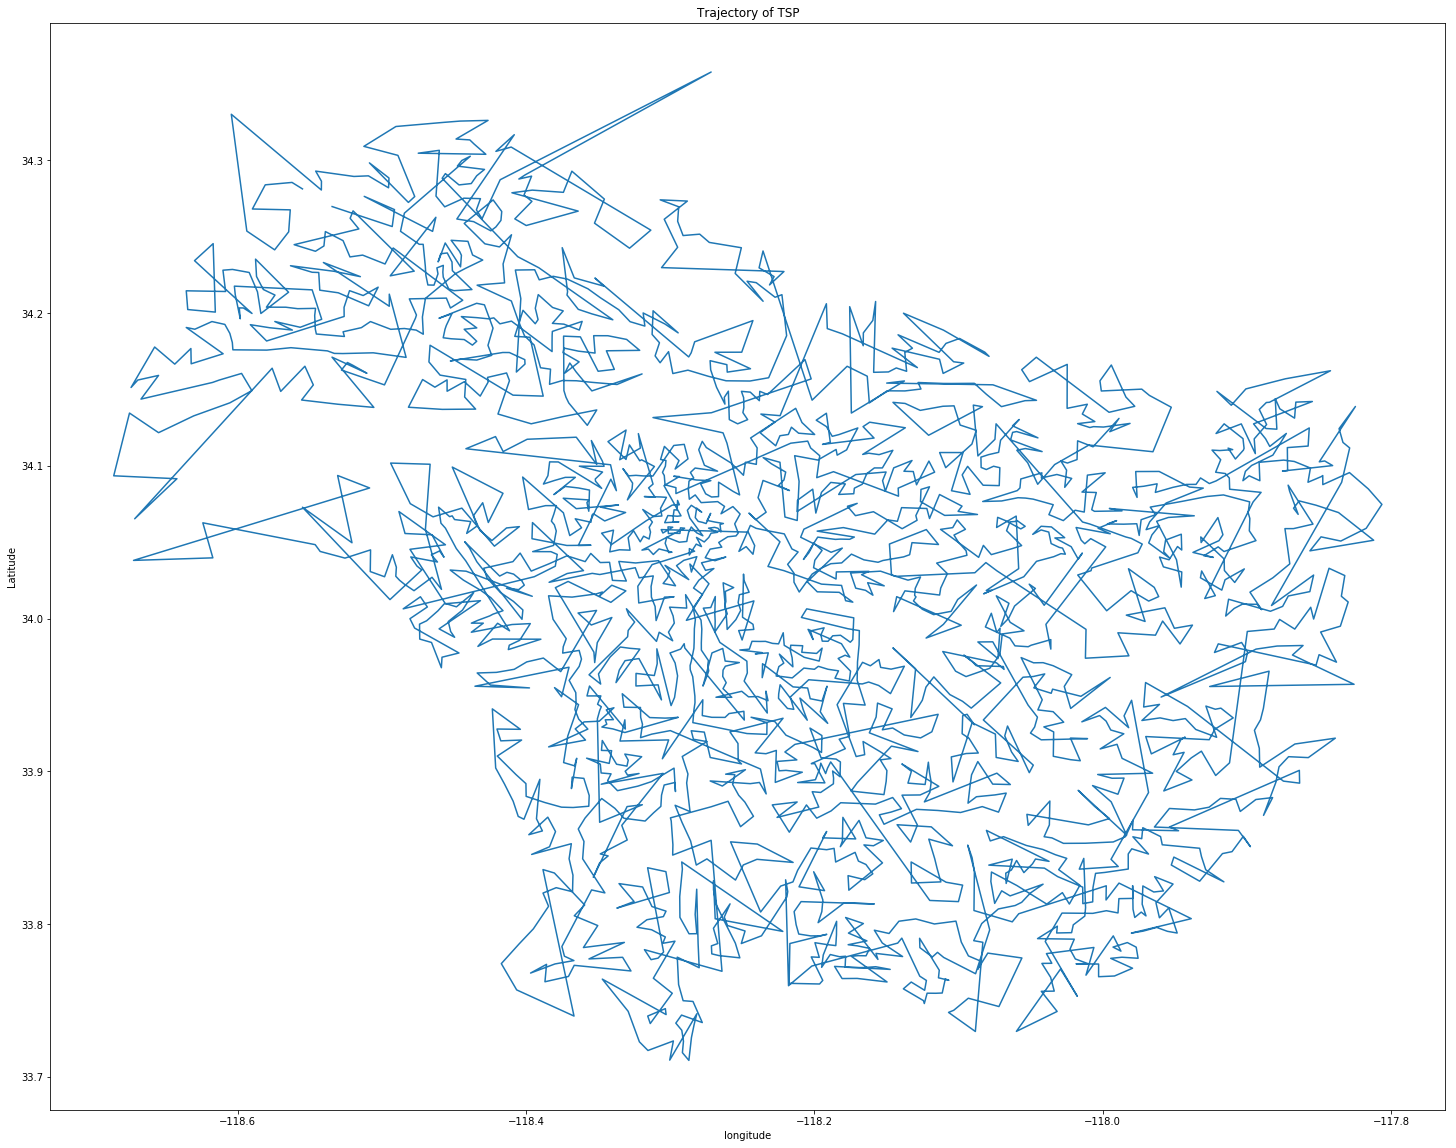

In [72]:
plt.figure(figsize=(25,20))
plt.plot(lon,lat)
plt.xlabel('longitude')
plt.ylabel('Latitude')
plt.title('Trajectory of TSP')
plt.show()

In [73]:
print(location_dict[mst.vs[1]['name']]['mean_coord'])
print(location_dict[mst.vs[1]['name']]['coord_list'])


[-118.601698     34.21202888]
[[-118.597521, 34.210108], [-118.597518, 34.208293], [-118.605871, 34.20828], [-118.605884, 34.212815], [-118.60589, 34.215543], [-118.605849, 34.215533], [-118.59753, 34.215551], [-118.597521, 34.210108]]


Question 11. Plot the road mash

In [74]:
#create GCC graph
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

gcc_sc=np.loadtxt('GCC.txt')
gcc_g={}
gcc_id = set()
for line in gcc_sc:
    gcc_id.add(line[0])
    gcc_id.add(line[1])
    location=tuple(np.sort(line[0:2]).astype('int'))
    gcc_g[location]=line[2]
#gcc_g is a dictionary where keys are edge start point and end point, value are weight

In [75]:
#map location id into coordinates

coords=np.zeros((len(gcc_id),2))
for n, location in enumerate(gcc_id):
    coords[n,:]=location_dict[str(location)]['mean_coord']
print(coords)


[[-118.12053321   34.10309557]
 [-118.13785063   34.09645121]
 [-118.13138209   34.09626386]
 ...
 [-118.07835877   33.79620758]
 [-118.08311857   33.78805729]
 [-118.07969634   33.7809931 ]]


Text(0.5, 1.0, 'Triangulzted Graph')

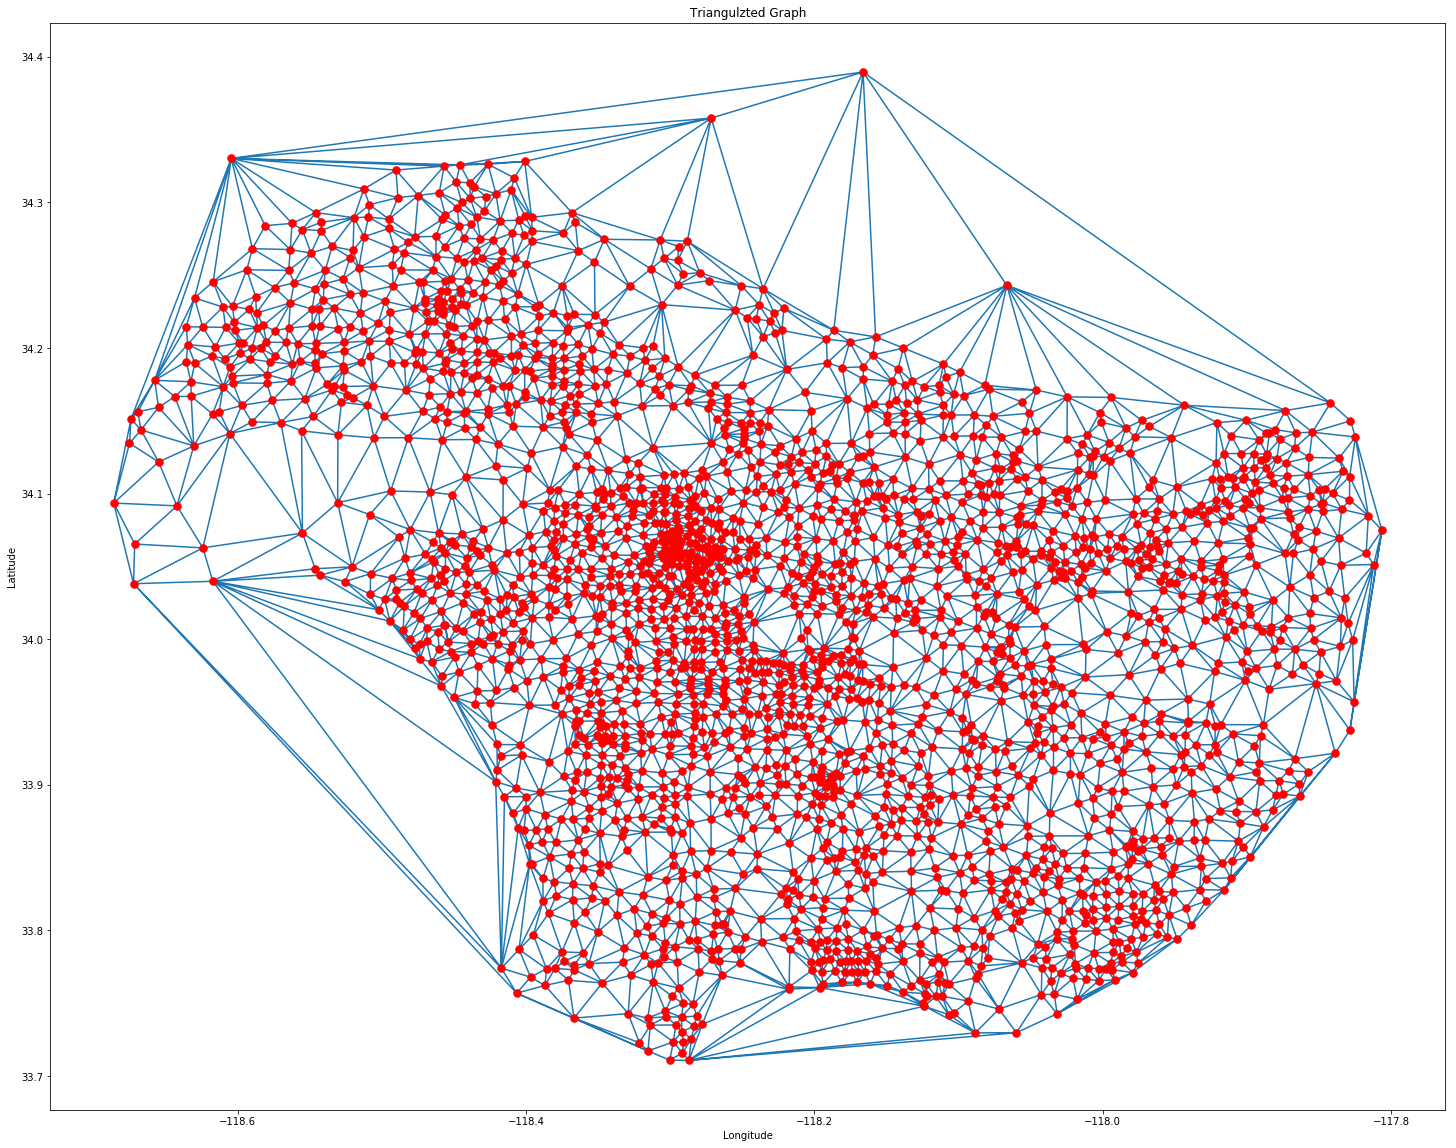

In [76]:
#generate triangulation
tri_g=Delaunay(coords)
plt.figure(figsize=(25,20))
plt.triplot(coords[:,0],coords[:,1],tri_g.simplices.copy())
plt.plot(coords[:,0],coords[:,1],'r.',markersize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Triangulzted Graph')


Question 12. Calculate. the traffic flow for each roda. in terms of cars/hour

In [77]:
#data and factor preparation in mile and hour
factor=69#69 miles per degree for longitude and latitude
car_len=0.003#define length of car in mile



In [78]:
#generate graph with flow as edge weights
#get flow 
tri_g12={}
for tri_ids in tri_g.simplices:
    triangle=[gcc_id[tri_ids[0]],gcc_id[tri_ids[1]],gcc_id[tri_ids[2]]]
    flow_time_edge_threshold_append(tri_g12,triangle,gcc_g,location_dict, True, False)    
    

In [79]:
#check results
print(tri_g12)


{(1711, 2469): 2527.1699239893887, (2466, 2469): 3039.5647188594166, (2465, 2469): 2899.019243667405, (2465, 2466): 3197.0675172718043, (147, 2465): 3014.36763301189, (146, 2465): 2798.698704540042, (147, 2466): 3204.103749477589, (147, 148): 3136.0833609107153, (148, 2466): 3140.9927934652587, (2471, 2474): 3075.9471559114077, (733, 2474): 3469.5960214006523, (2472, 2474): 3384.5295804683105, (1712, 2470): 3034.2286917224064, (1522, 1712): 2835.284162077575, (2469, 2470): 2408.2204279714592, (2465, 2470): 2498.776144837963, (1711, 2470): 2947.2223450173597, (995, 1694): 2969.1215042565636, (1694, 2472): 3138.0743011823415, (386, 2165): 3362.106184492419, (995, 2468): 2546.7573127414125, (995, 2472): 3028.636150850489, (148, 2468): 2314.4509194453453, (2466, 2468): 2868.8326742567792, (1000, 2464): 2567.725453784459, (2464, 2470): 2721.4761840824335, (1522, 2470): 2933.577238356387, (2464, 2465): 3203.256701536852, (146, 2464): 3021.2417036728093, (1525, 1955): 2884.1568150686803, (152

Question 13. Calculate the maximum number of cars that can commute per hour from Malibu to Long Beach

In [98]:
#get location id according to lon and lat
for i in location_dict.keys():
    coord_temp=[]
    coord_temp=location_dict[str(i)]['mean_coord']
    if abs(coord_temp[0]+118.56)<1.5e-2 and abs(coord_temp[1]-34.04)<1e-2:
        start_id=i
        print("source id is ",i)
    if abs(coord_temp[0]+118.18)<5e-3 and abs(coord_temp[1]-33.77)<2e-3:
        end_id=i
        print("destination id is ",i)
        

destination id is  672
source id is  1523


In [114]:
#check corresponding id
print("Source  coordinate is ",location_dict[str(start_id)]['mean_coord'] )
start_coord=location_dict[str(start_id)]['mean_coord']
print("DEstination  coordinate is ",location_dict[str(end_id)]['mean_coord'] )
end_coord=location_dict[str(end_id)]['mean_coord']


Source  coordinate is  [-118.54625915   34.04840305]
DEstination  coordinate is  [-118.1786595   33.7717677]


In [115]:
#write graph to txt for further analysis in R
with open('tri_g12.txt','w') as f:
    for locations in tri_g12:
        string='{} {} {:.2f}\n'.format(int(locations[0]),int(locations[1]),tri_g12[locations])
        f.write(string)
        

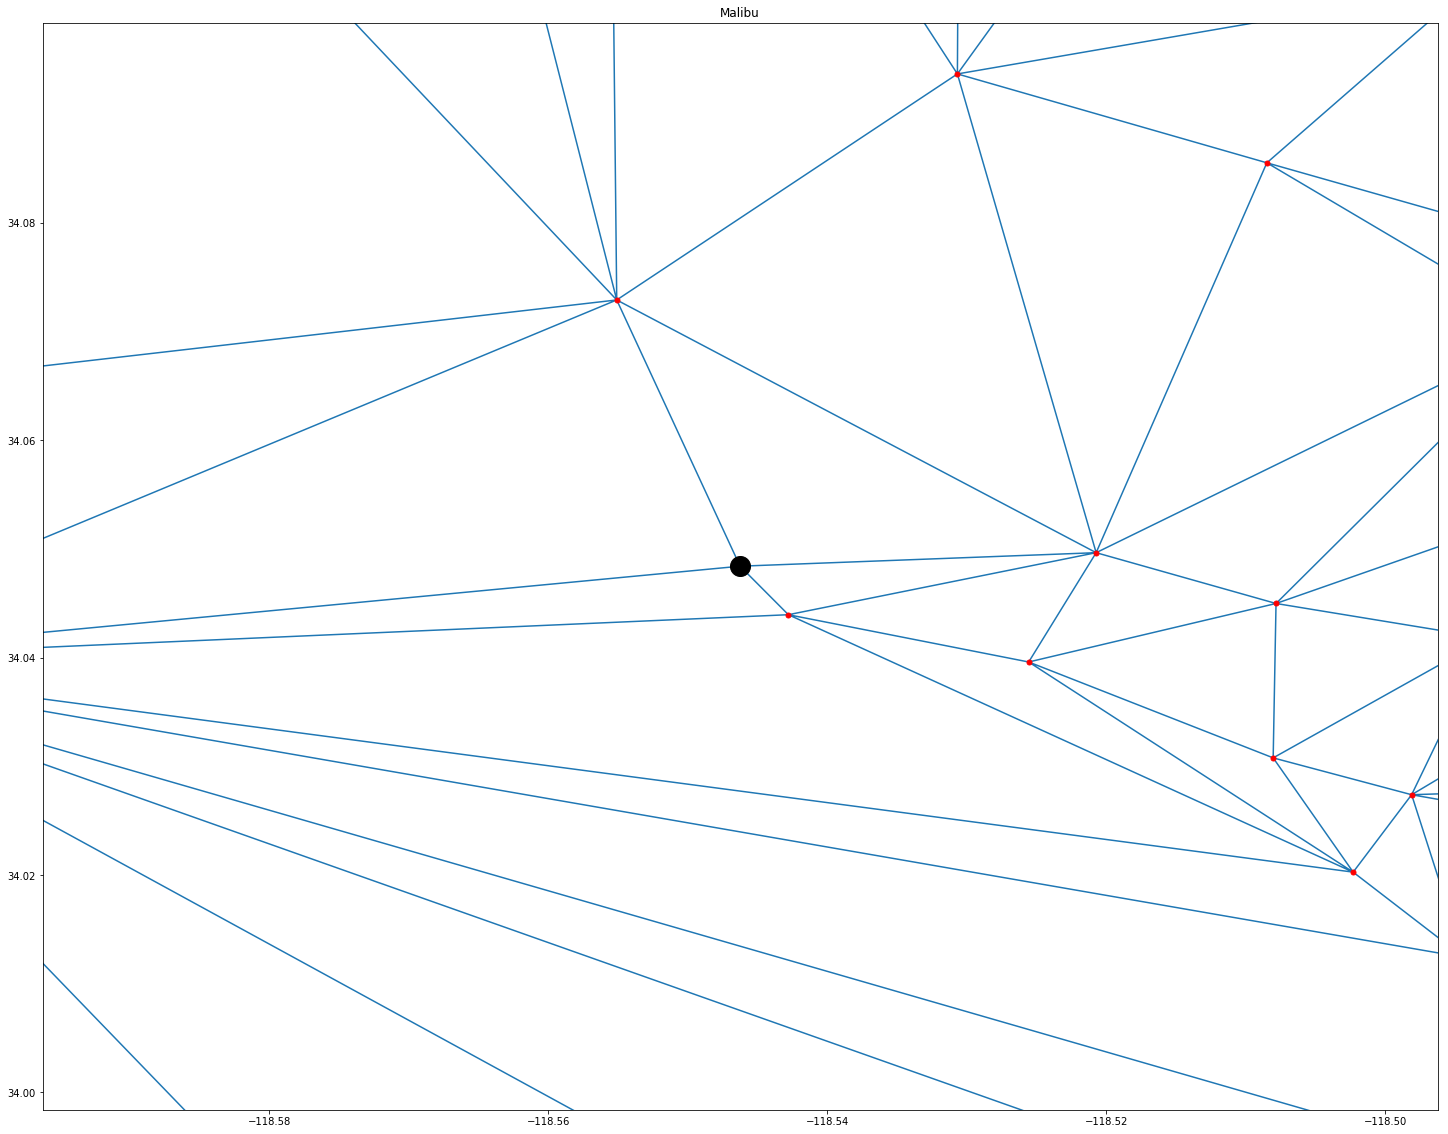

In [101]:
plt.figure(figsize=(25,20))
plt.triplot(coords[:,0],coords[:,1],tri_g.simplices.copy())
plt.plot(coords[:,0],coords[:,1],'r.',markersize=10)
plt.plot(start_coord[0],start_coord[1],'k.',markersize=40)
plt.xlim([start_coord[0]-0.05,start_coord[0]+0.05])
plt.ylim([start_coord[1]-0.05,start_coord[1]+0.05])
plt.title('Malibu')
plt.show()



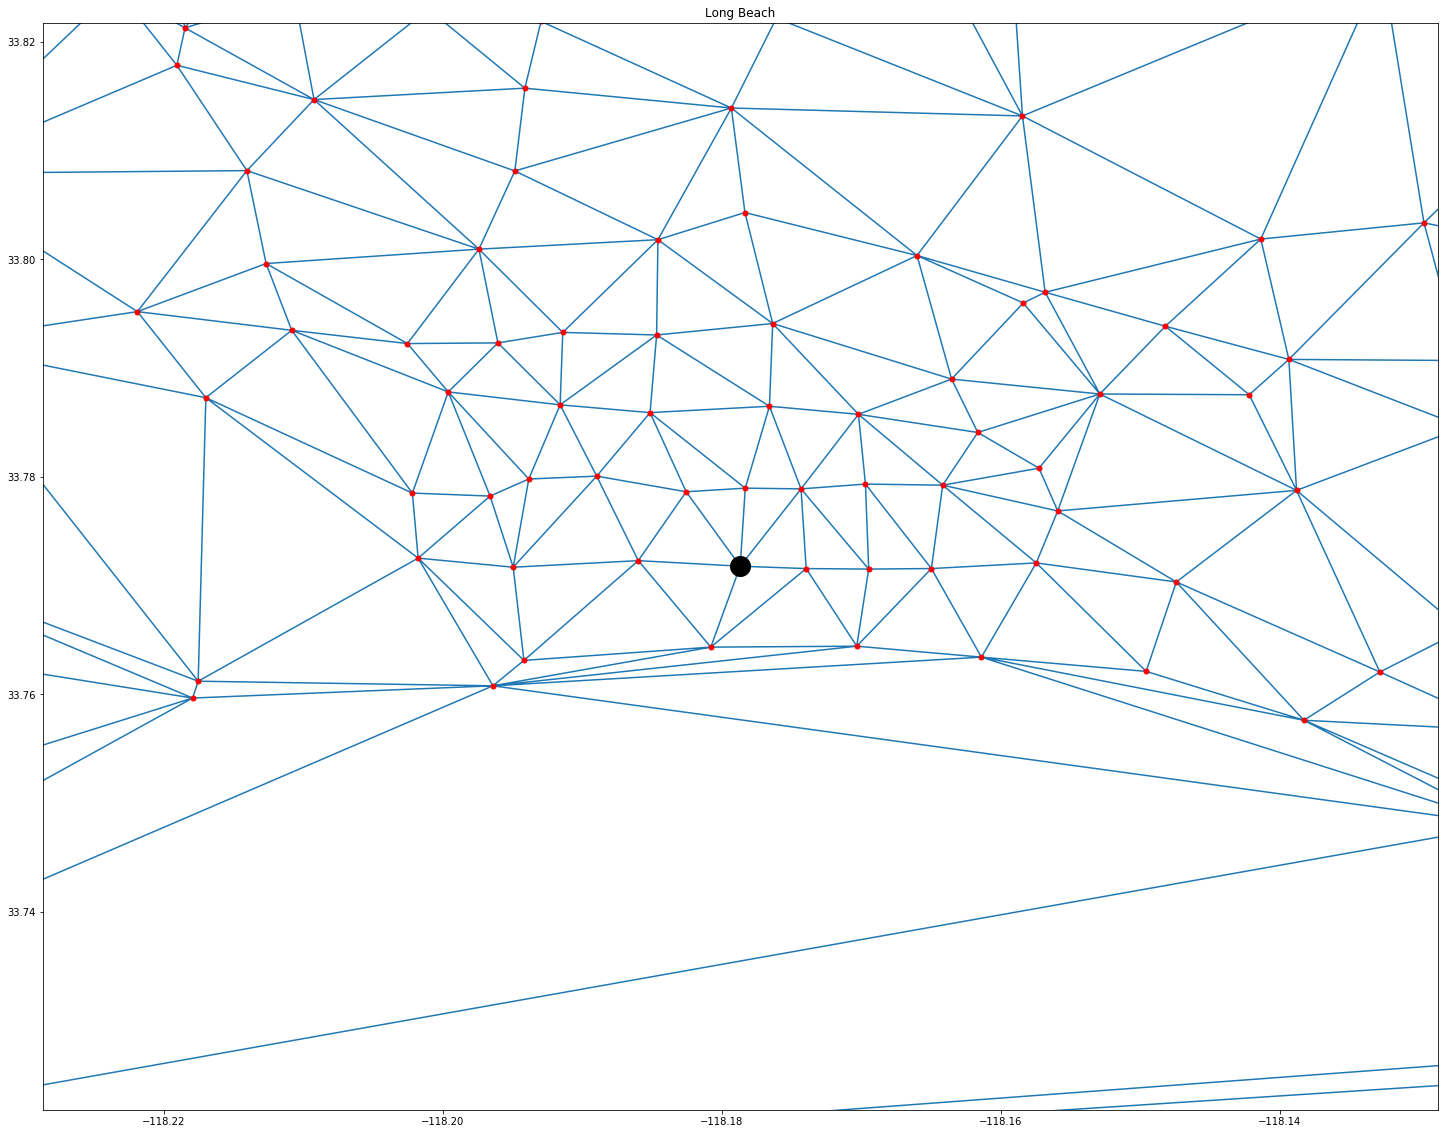

In [102]:
plt.figure(figsize=(25,20))
plt.triplot(coords[:,0],coords[:,1],tri_g.simplices.copy())
plt.plot(coords[:,0],coords[:,1],'r.',markersize=10)
plt.plot(end_coord[0],end_coord[1],'k.',markersize=40)
plt.xlim([end_coord[0]-0.05,end_coord[0]+0.05])
plt.ylim([end_coord[1]-0.05,end_coord[1]+0.05])
plt.title('Long Beach')
plt.show()




Question 14. Prune

In [125]:
#generate graph with flow as edge weights
threshold=720# in sceond
tri_g14={}
for tri_ids in tri_g.simplices:
    triangle=[gcc_id[tri_ids[0]],gcc_id[tri_ids[1]],gcc_id[tri_ids[2]]]
    flow_time_edge_threshold_append(tri_g14,triangle,gcc_g,location_dict,threshold, False, True)
    

862.39
862.39
978.1
873.72
1077.74
1077.74
1077.74
1077.74
1400.6
1198.93
1198.93
729.75
1198.93
1198.93
721.48
893.52
893.52
808.35
770.63
733.51
871.73
871.73
871.73
1042.8
1042.8
1042.8
1042.8
721.27
1672.47
1672.47
1672.47
884.62
982.3
1048.7
1048.7
834.53
1248.48
924.53
1237.12
1180.23
781.5
781.5
925.3
925.3
819.08
925.3
925.3
1024.69
1882.74
1882.74
1689.25
1882.74
1882.74
1446.49
1446.49
893.52
836.22
770.42
770.42
770.42
770.42
781.5
747.4
1447.4
1313.24
1313.24
1667.08
1446.49
740.33
729.07
741.09
837.66
837.66
1313.24
769.17
761.52
761.52
761.52


In [105]:
#check results
print(tri_g14)
print(tri_g14)

{(1711, 2469): 532.32, (2466, 2469): 268.62, (2465, 2469): 437.33, (2465, 2466): 254.44, (147, 2465): 292.61, (146, 2465): 563.49, (147, 2466): 238.75, (147, 148): 162.66, (148, 2466): 285.69, (733, 2474): 306.17, (2472, 2474): 978.1, (1712, 2470): 205.56, (1522, 1712): 873.72, (1711, 2470): 550.17, (995, 1694): 615.26, (1694, 2472): 671.54, (386, 2165): 103.19, (995, 2468): 592.32, (995, 2472): 1400.6, (148, 2468): 428.76, (2466, 2468): 692.3, (1000, 2464): 667.06, (2464, 2465): 351.88, (146, 2464): 232.97, (1525, 1955): 223.99, (1525, 1956): 292.1, (1523, 1712): 324.11, (1522, 1523): 291.05, (1000, 1017): 186.07, (1672, 1674): 132.66, (1672, 1673): 230.5, (1669, 1674): 193.71, (1669, 1672): 123.69, (2627, 2690): 139.11, (2626, 2690): 138.88, (1954, 1955): 117.19, (1955, 1956): 131.49, (1952, 1954): 235.19, (1953, 1954): 143.9, (1952, 1953): 102.39, (707, 2474): 721.48, (2147, 2474): 435.71, (364, 376): 205.67, (364, 1082): 170.84, (287, 1729): 607.22, (2528, 2662): 142.13, (2528, 259

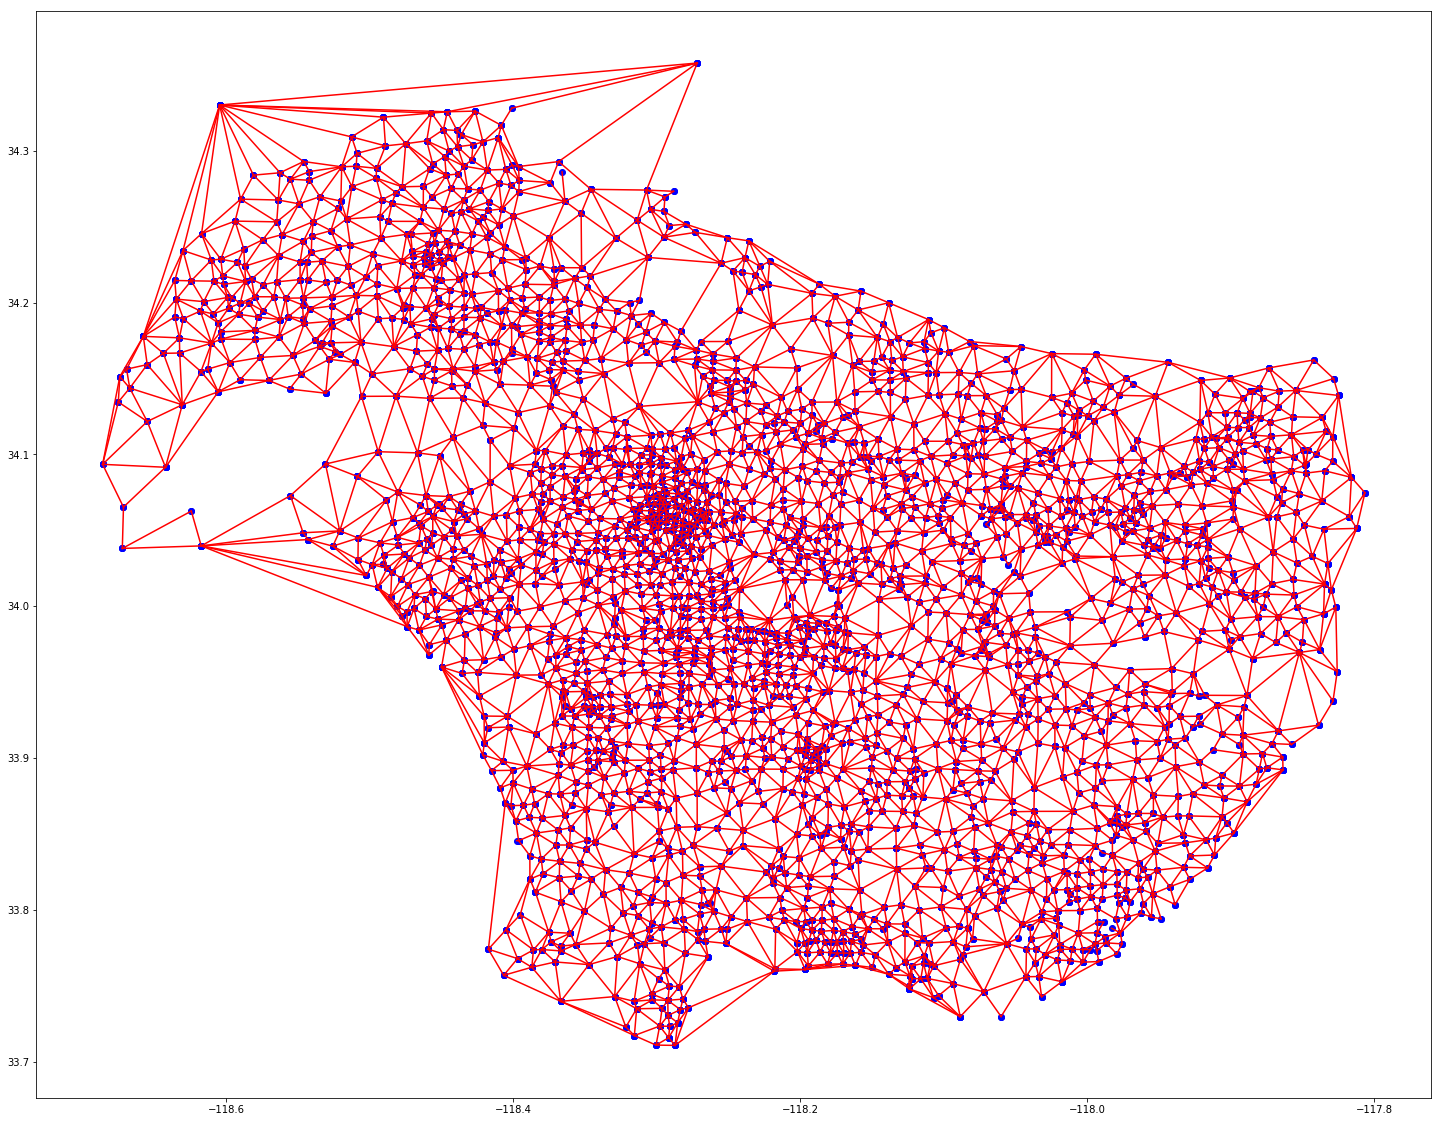

In [106]:
plt.figure(figsize=(25,20))
for i in tri_g14.keys():
    end1=i[0]
    end2=i[1]
    x=[]
    y=[]
    x.append(location_dict[str(end1)]['mean_coord'][0])
    x.append(location_dict[str(end2)]['mean_coord'][0])
    y.append(location_dict[str(end1)]['mean_coord'][1])
    y.append(location_dict[str(end2)]['mean_coord'][1])
    plt.plot(x,y,color='r')
    plt.scatter(x,y,color='b')
    

Text(0.5, 1.0, 'Malibu')

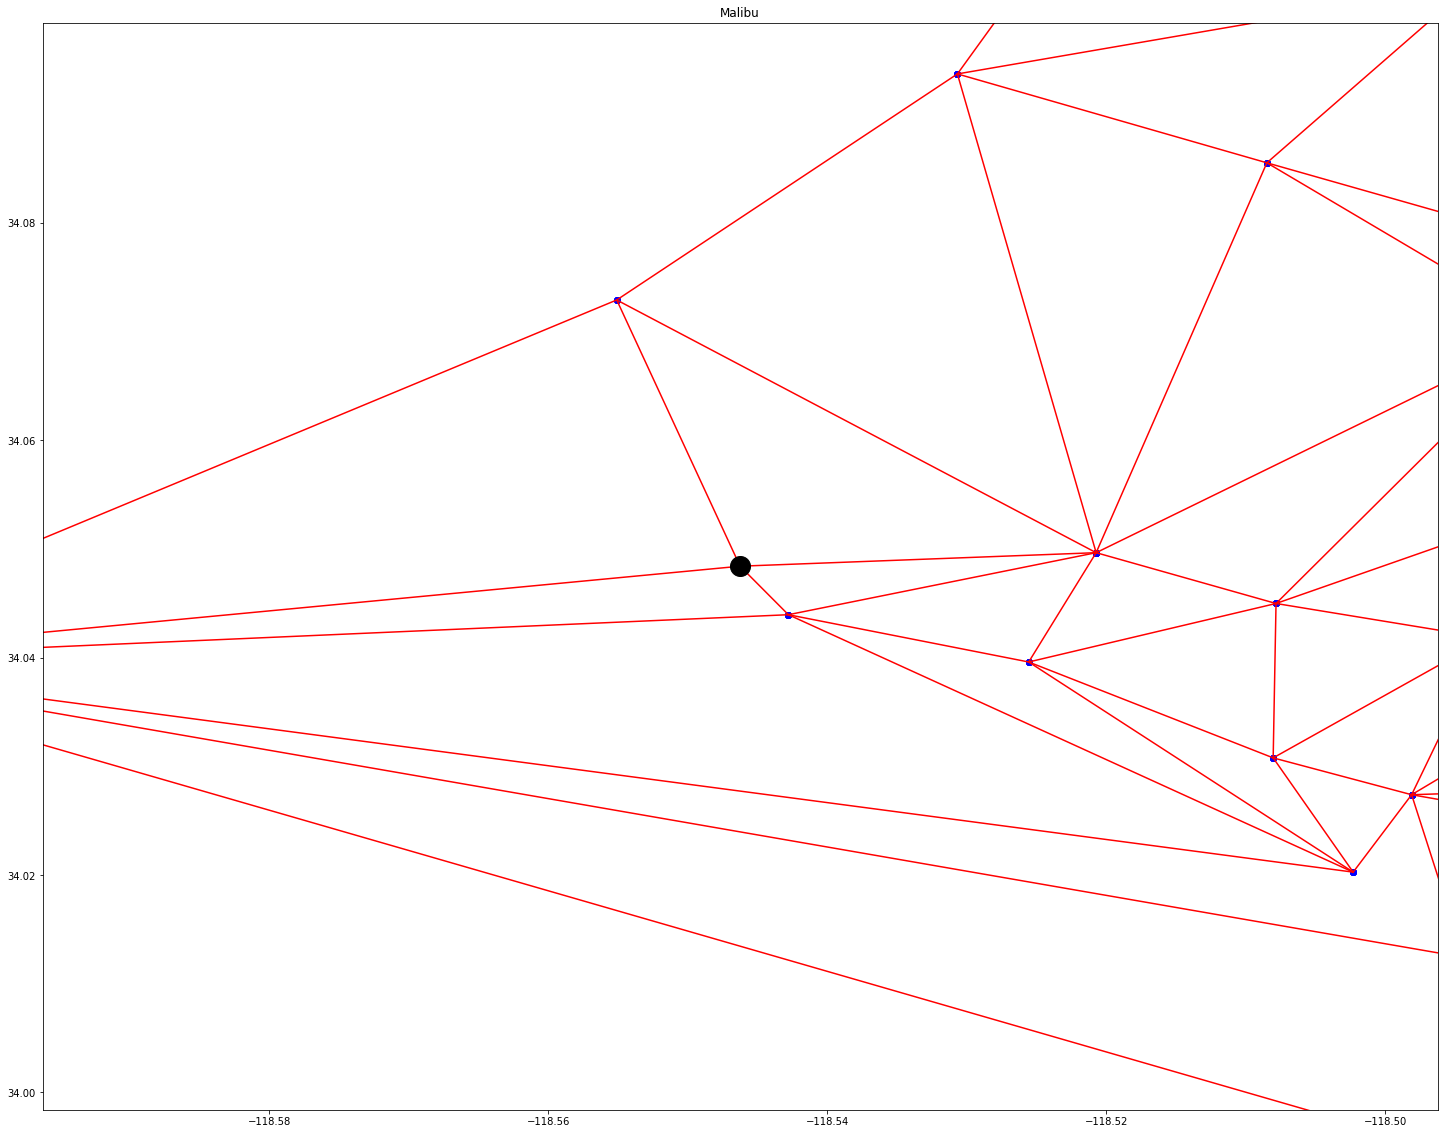

In [107]:
plt.figure(figsize=(25,20))
for i in tri_g14.keys():
    end1=i[0]
    end2=i[1]
    x=[]
    y=[]
    x.append(location_dict[str(end1)]['mean_coord'][0])
    x.append(location_dict[str(end2)]['mean_coord'][0])
    y.append(location_dict[str(end1)]['mean_coord'][1])
    y.append(location_dict[str(end2)]['mean_coord'][1])
    plt.plot(x,y,color='r')
    plt.scatter(x,y,color='b')
plt.xlim([start_coord[0]-0.05,start_coord[0]+0.05])
plt.ylim([start_coord[1]-0.05,start_coord[1]+0.05])
plt.plot(start_coord[0],start_coord[1],'k.',markersize=40)
plt.title('Malibu')

Text(0.5, 1.0, 'Long Beach')

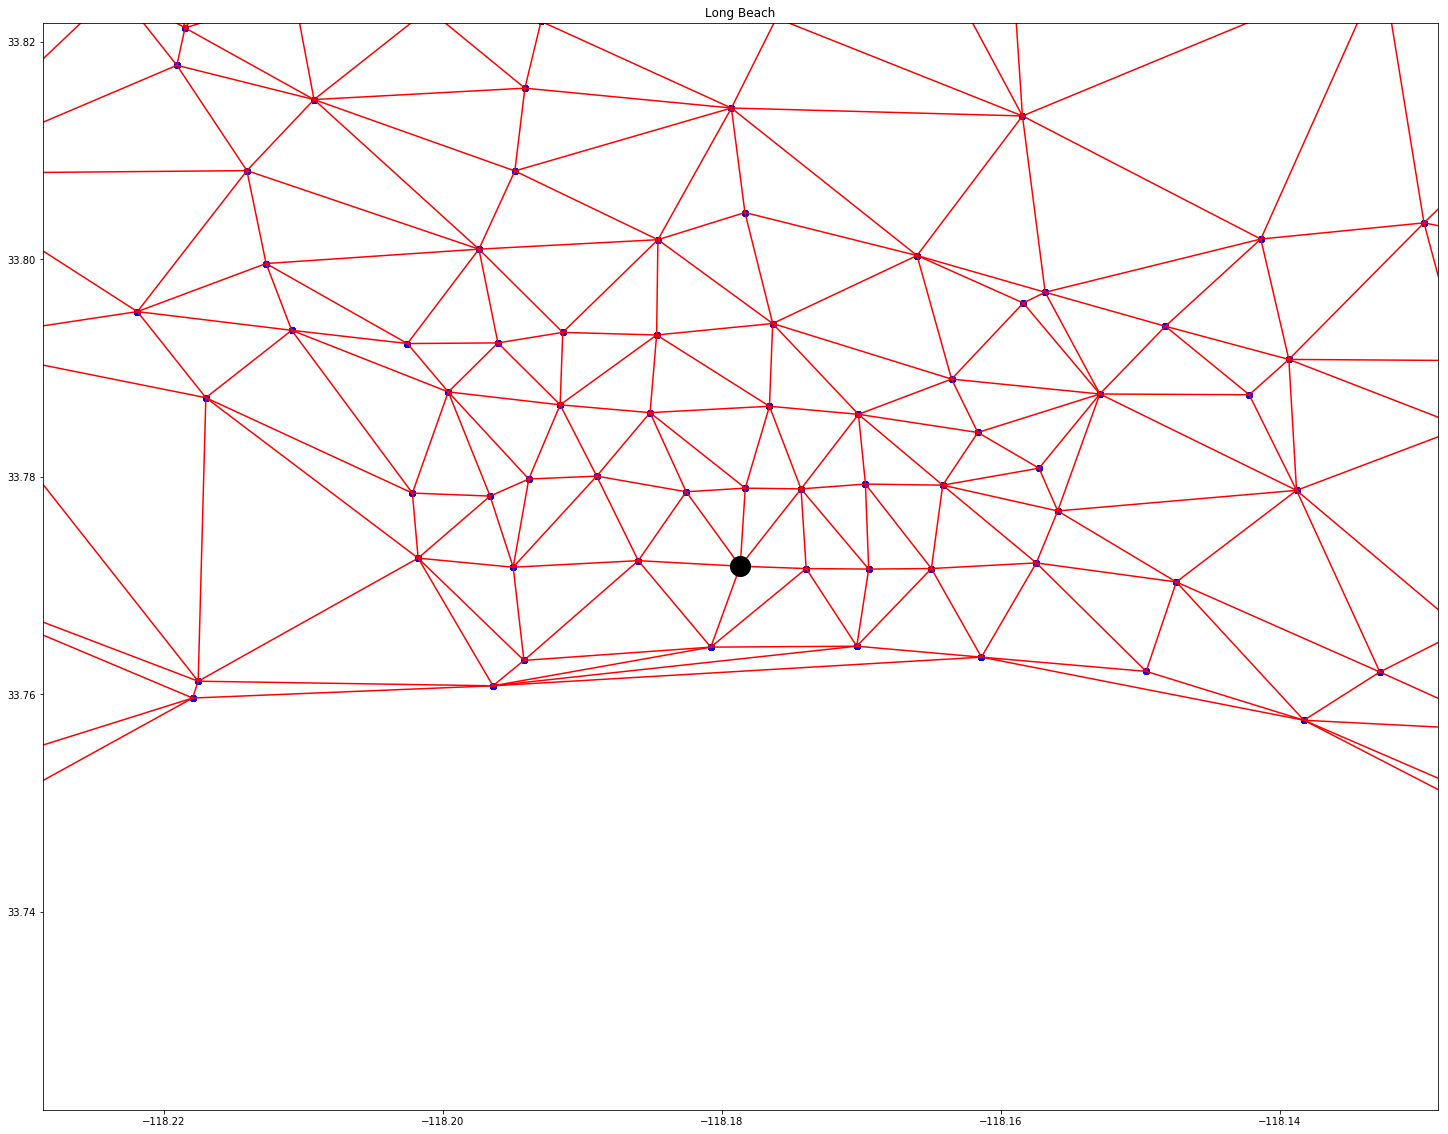

In [108]:
plt.figure(figsize=(25,20))
for i in tri_g14.keys():
    end1=i[0]
    end2=i[1]
    x=[]
    y=[]
    x.append(location_dict[str(end1)]['mean_coord'][0])
    x.append(location_dict[str(end2)]['mean_coord'][0])
    y.append(location_dict[str(end1)]['mean_coord'][1])
    y.append(location_dict[str(end2)]['mean_coord'][1])
    plt.plot(x,y,color='r')
    plt.scatter(x,y,color='b')
plt.xlim([end_coord[0]-0.05,end_coord[0]+0.05])
plt.ylim([end_coord[1]-0.05,end_coord[1]+0.05])
plt.plot(end_coord[0],end_coord[1],'k.',markersize=40)
plt.title('Long Beach')

Question. 15. Repeat. 13 for pruned graph

In [110]:
tri_g15={}
threshold=720
#generate graph with flow as edge weights
for tri_ids in tri_g.simplices:
    triangle=[gcc_id[tri_ids[0]],gcc_id[tri_ids[1]],gcc_id[tri_ids[2]]]
    flow_time_edge_threshold_append(tri_g15,triangle,gcc_g,location_dict,threshold, True, True)
    

In [111]:
#write graph to file for further analysis in R
with open('tri_g15.txt','w') as f:
    for locations in tri_g15:
        string='{} {} {:.2f}\n'.format(int(locations[0]),int(locations[1]),tri_g15[locations])
        f.write(string)
    